## Import Libraries 

In [2]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv ('credit_card_fraud.csv')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


## Step 3: Extract city population, job and dob 

In [4]:
my_data = data[['city_pop','job','dob','is_fraud']]

In [5]:
data_df = pd.DataFrame (my_data)
data_df

,city_pop,job,dob,is_fraud
0,149,Special educational needs teacher,1978-06-21,0
1,4154,Nature conservation officer,1962-01-19,0
2,589,Systems analyst,1945-12-21,0
3,899,Naval architect,1967-08-30,0
4,471,"Education officer, museum",1967-08-02,0
...,...,...,...,...
339602,145,"Administrator, education",1939-11-09,0
339603,308,Call centre manager,1958-09-20,0
339604,519,Town planner,1966-02-13,0
339605,3684,Musician,1981-11-29,0


In [6]:
data_df ['is_fraud'].sum()

1782

## Convert dob to age 

In [7]:
data_df['YearBorn'] = pd.to_datetime(data_df['dob']).dt.year

In [8]:
age_conversion = datetime.now().year

In [9]:
data_df ['Age'] = age_conversion - data_df ['YearBorn'].astype(int)

In [10]:
avg_age = my_data['Age'].mean()
rounded_avg_age = round(avg_age,1)
rounded_avg_age

51.3

In [11]:
data_df['Age'].min()

22

## Group age by 10 years

In [12]:
age_groups = pd.cut(data_df['Age'],bins=range(19, 91, 10),right = False,labels= ['20-29','30-39','40-49','50-59','60-69','70-79','80-89'])

In [13]:
data_df['Age Group'] = age_groups

In [14]:
fraud_per_age_group = data_df.groupby ('Age Group')['is_fraud'].sum()

In [15]:
fraud_per_age_group


Age Group
20-29    149
30-39    283
40-49    241
50-59    432
60-69    315
70-79    135
80-89    168
Name: is_fraud, dtype: int64

Text(0, 0.5, 'Fraud Rate')

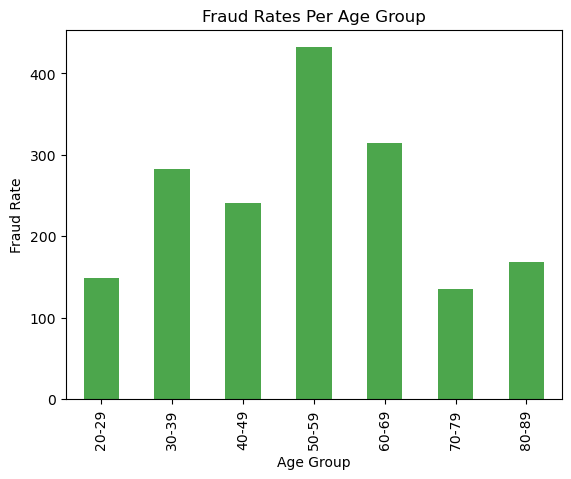

In [19]:
fraud_per_age_group.plot (kind='bar',color = 'green',alpha = 0.7)
plt.title ("Fraud Rates Per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Fraud Rate")

In [20]:
bins = [0, 100000, 500000, 1000000, float('inf')]

## Create city population Categories 

In [21]:
my_data['Population_Category'] = pd.cut(my_data['city_pop'], bins=bins, right=False)

/var/folders/_c/9_5fy2qn1dgbqgk2pwk195840000gn/T/ipykernel_21021/1769285030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Population_Category'] = pd.cut(my_data['city_pop'], bins=bins, right=False)


In [22]:
grouped_population = my_data.groupby('Population_Category').size()

In [23]:
pd.DataFrame (grouped_population)

,0
Population_Category,
"[0.0, 100000.0)",284663
"[100000.0, 500000.0)",27100
"[500000.0, 1000000.0)",16146
"[1000000.0, inf)",11698


In [24]:
population_fraud = my_data.groupby('Population_Category')['is_fraud'].sum()
population_fraud

Population_Category
[0.0, 100000.0)          1446
[100000.0, 500000.0)      168
[500000.0, 1000000.0)     124
[1000000.0, inf)           44
Name: is_fraud, dtype: int64

In [25]:
total = population_fraud.sum()

In [26]:
custom_labels = ['0-100k', '100k-500k', '500k-1M', '>1M']

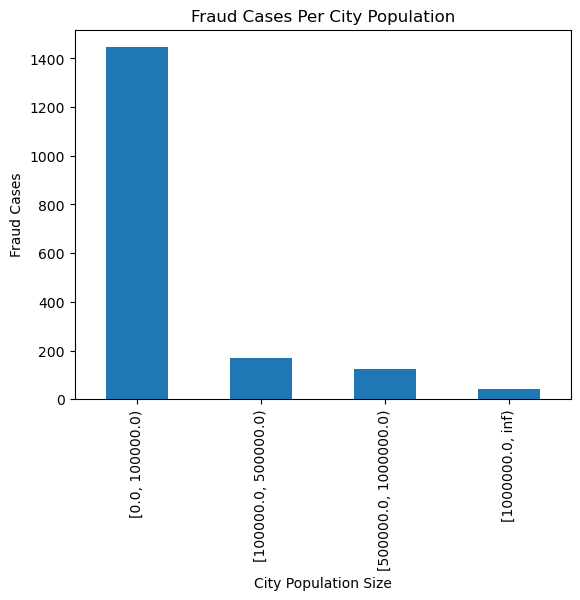

In [27]:
population_fraud.plot (kind = 'bar')
plt.title ('Fraud Cases Per City Population')
plt.ylabel ('Fraud Cases')
plt.xlabel('City Population Size')
plt.show()